**Author:** Andres Cornejo, **UNIVERSIDAD NACIONAL AUTONOMA DE MEXICO**

**Copyright** ©2020 Version (09/2020)

In [ ]:
#!pip install tensorflow --upgrade  #Install the latest TensorFlow version
#!pip install keras
#!pip install tensorflow_datasets   #Run one time
#!pip install gitpython
import tensorflow as tf
import tensorflow.keras as keras

import tensorflow.keras as tfk
import tensorflow.keras.layers as tkl
print('Tensorflow:{}'.format(tf.__version__))
print('Keras:{}'.format(tfk.__version__))
import pandas as pd
import numpy as np
#import tensorflow_datasets as tfds

Tensorflow:2.3.0
Keras:2.4.0


In [ ]:
#import git
!git clone https://github.com/KunaCornejo/RainAttenuationPrediction.git

Cloning into 'RainAttenuationPrediction'...
remote: Enumerating objects: 68, done.
remote: Counting objects: 100% (68/68), done.
remote: Compressing objects: 100% (66/66), done.
remote: Total 68 (delta 19), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (68/68), done.


In [ ]:
ls 'RainAttenuationPrediction'

c_n_ul.csv               Matriz_Train_90.csv.zip  TrainedData_Graph.ipynb
Matriz_Arain.csv.zip     RainAttenuation.ipynb
Matriz_Train_70.csv.zip  README.md


In [ ]:
#Unzip the .csv file
import zipfile #import ZipFile
with zipfile.ZipFile('/content/RainAttenuationPrediction/Matriz_Arain.csv.zip','r') as zip_ref:
    zip_ref.extractall('content')

In [ ]:
from numpy import genfromtxt
matrix_input = genfromtxt('content/Matriz_Arain.csv', delimiter=',') #Matrix_Arain.csv contains the rain attenuation time series obtained from ITU-R P1853-1 by each site
matrix_input=np.transpose(matrix_input)
print(matrix_input[:,:].shape)

(25, 525601)


(525601,)


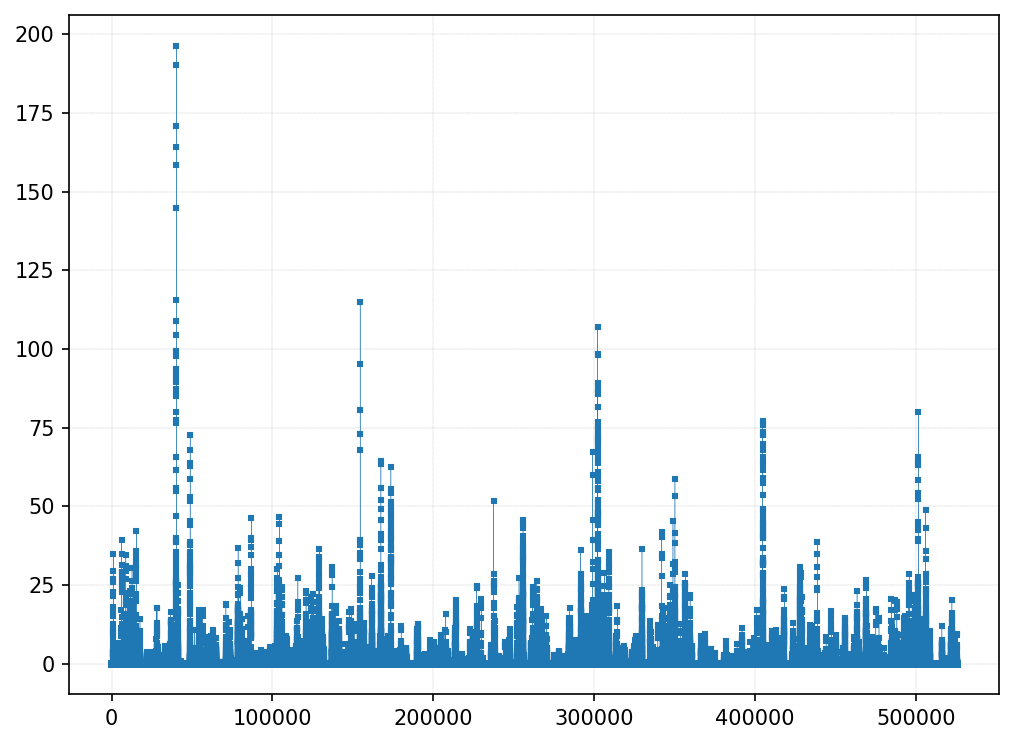

In [ ]:
index=24 #Indicates the location to train [MANUALLY]

print(matrix_input[index,:].shape)
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.pyplot import grid
figure(num=None, figsize=(8, 6), dpi=150, facecolor='w', edgecolor='k')
grid(color='k', linestyle=':', linewidth=.1)
plt.plot(matrix_input[index,:],'s-',linewidth=.2,markersize=2)

In [ ]:
keras.backend.clear_session()
dataset=matrix_input[index]
print(dataset.shape)

(525601,)


In [ ]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Activation
from keras.layers import Dropout
from keras.layers import TimeDistributed
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [ ]:
# fix random seed for reproducibility
np.random.seed(7)
dataset = dataset.astype('float32')

#Partition Dataset
train_size = int(len(dataset) * 0.7)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size], dataset[train_size:len(dataset)]
print(len(train), len(test))

# normalize the dataset, by feature scaling

mu=np.min(train)
sig=(np.max(train)-np.min(train))

train=(train-mu)/sig
test=(test-mu)/sig

367920 157681


In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back)]
		dataX.append(a)
		dataY.append(dataset[i + look_back])
	return np.array(dataX), np.array(dataY)

In [ ]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [ ]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
trainY = np.reshape(trainY, (trainY.shape[0], 1))
Training=0

In [ ]:
#!sudo pip install h5p
from keras.models import Sequential
from keras import regularizers
from keras.callbacks import EarlyStopping
from keras.models import load_model
from pandas import DataFrame

Training+=1
model=Sequential()
model.add(LSTM(200, input_shape=(look_back,1),activation='tanh', bias_initializer='normal',kernel_regularizer=regularizers.l2(1e-6))) 
model.add(Dropout(0.2)) #0.2
model.add(Dense(75,activation='tanh', bias_initializer='normal')) 
model.add(Dense(50,activation='tanh', bias_initializer='normal')) 
model.add(Dense(25,activation='tanh', bias_initializer='normal')) 
model.add(Dense(5, activation='tanh', bias_initializer='normal'))     
model.add(Dense(1,activation='selu', bias_initializer='normal')) 
keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8, decay=0.9, amsgrad=False)
model.compile(optimizer='adam', loss='mae', metrics=['mae']) 

es = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=5) #patience=5 val_loss
#mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

history=model.fit(trainX, trainY, epochs=250, batch_size=1024, verbose=1, validation_data=(testX, testY), shuffle=False, callbacks=[es], workers=2, use_multiprocessing=True)
model.summary()

Epoch 1/250
360/360 [==============================] - 16s 45ms/step - loss: 0.0136 - mae: 0.0136 - val_loss: 0.0042 - val_mae: 0.0042
Epoch 2/250
360/360 [==============================] - 16s 44ms/step - loss: 0.0051 - mae: 0.0051 - val_loss: 0.0039 - val_mae: 0.0039
Epoch 3/250
360/360 [==============================] - 16s 44ms/step - loss: 0.0036 - mae: 0.0036 - val_loss: 0.0021 - val_mae: 0.0021
Epoch 4/250
360/360 [==============================] - 16s 44ms/step - loss: 0.0028 - mae: 0.0028 - val_loss: 0.0049 - val_mae: 0.0049
Epoch 5/250
360/360 [==============================] - 16s 44ms/step - loss: 0.0032 - mae: 0.0032 - val_loss: 8.2903e-04 - val_mae: 8.2108e-04
Epoch 6/250
360/360 [==============================] - 16s 44ms/step - loss: 0.0026 - mae: 0.0026 - val_loss: 0.0029 - val_mae: 0.0029
Epoch 7/250
360/360 [==============================] - 16s 44ms/step - loss: 0.0021 - mae: 0.0021 - val_loss: 0.0011 - val_mae: 0.0011
Epoch 8/250
360/360 [==========================

In [ ]:
hist = pd.DataFrame(history.history)
ubicaciones=['Panama','San Jose','Tegucigalpa','CDMX','Monterrey','Guadalajara'\
             ,'Tijuana','La Habana','Sto. Domingo','San Salvador','San Juan',\
             'Torreon','La Paz (BC)','Veracruz','Cancun','Chihuahua','Queretaro'\
             ,'Tuxtla (Gtz)','Cd. Juarez','San Pedro Sula','Belmopan','Kingston'\
             ,'Merida','Pto. Cabezas','Oaxaca']
hist =pd.DataFrame(history.history)
print(hist)

        loss       mae  val_loss   val_mae
0   0.013644  0.013642  0.004220  0.004218
1   0.005077  0.005074  0.003938  0.003935
2   0.003619  0.003616  0.002116  0.002112
3   0.002818  0.002813  0.004869  0.004863
4   0.003216  0.003209  0.000829  0.000821
5   0.002641  0.002632  0.002928  0.002918
6   0.002095  0.002084  0.001087  0.001075
7   0.001997  0.001984  0.002339  0.002324
8   0.002178  0.002160  0.005426  0.005406
9   0.002183  0.002162  0.002640  0.002617
10  0.001805  0.001782  0.001683  0.001660
11  0.001695  0.001673  0.002819  0.002796
12  0.001542  0.001519  0.000726  0.000704
13  0.001661  0.001639  0.001174  0.001151
14  0.001362  0.001340  0.001354  0.001332
15  0.001848  0.001826  0.001085  0.001062
16  0.001436  0.001413  0.001006  0.000983
17  0.001152  0.001130  0.001985  0.001962
18  0.001336  0.001313  0.001226  0.001203
19  0.001385  0.001362  0.000384  0.000361
20  0.001134  0.001111  0.001586  0.001563
21  0.001191  0.001169  0.000371  0.000348
22  0.00131

findfont: Font family ['Times'] not found. Falling back to DejaVu Sans.


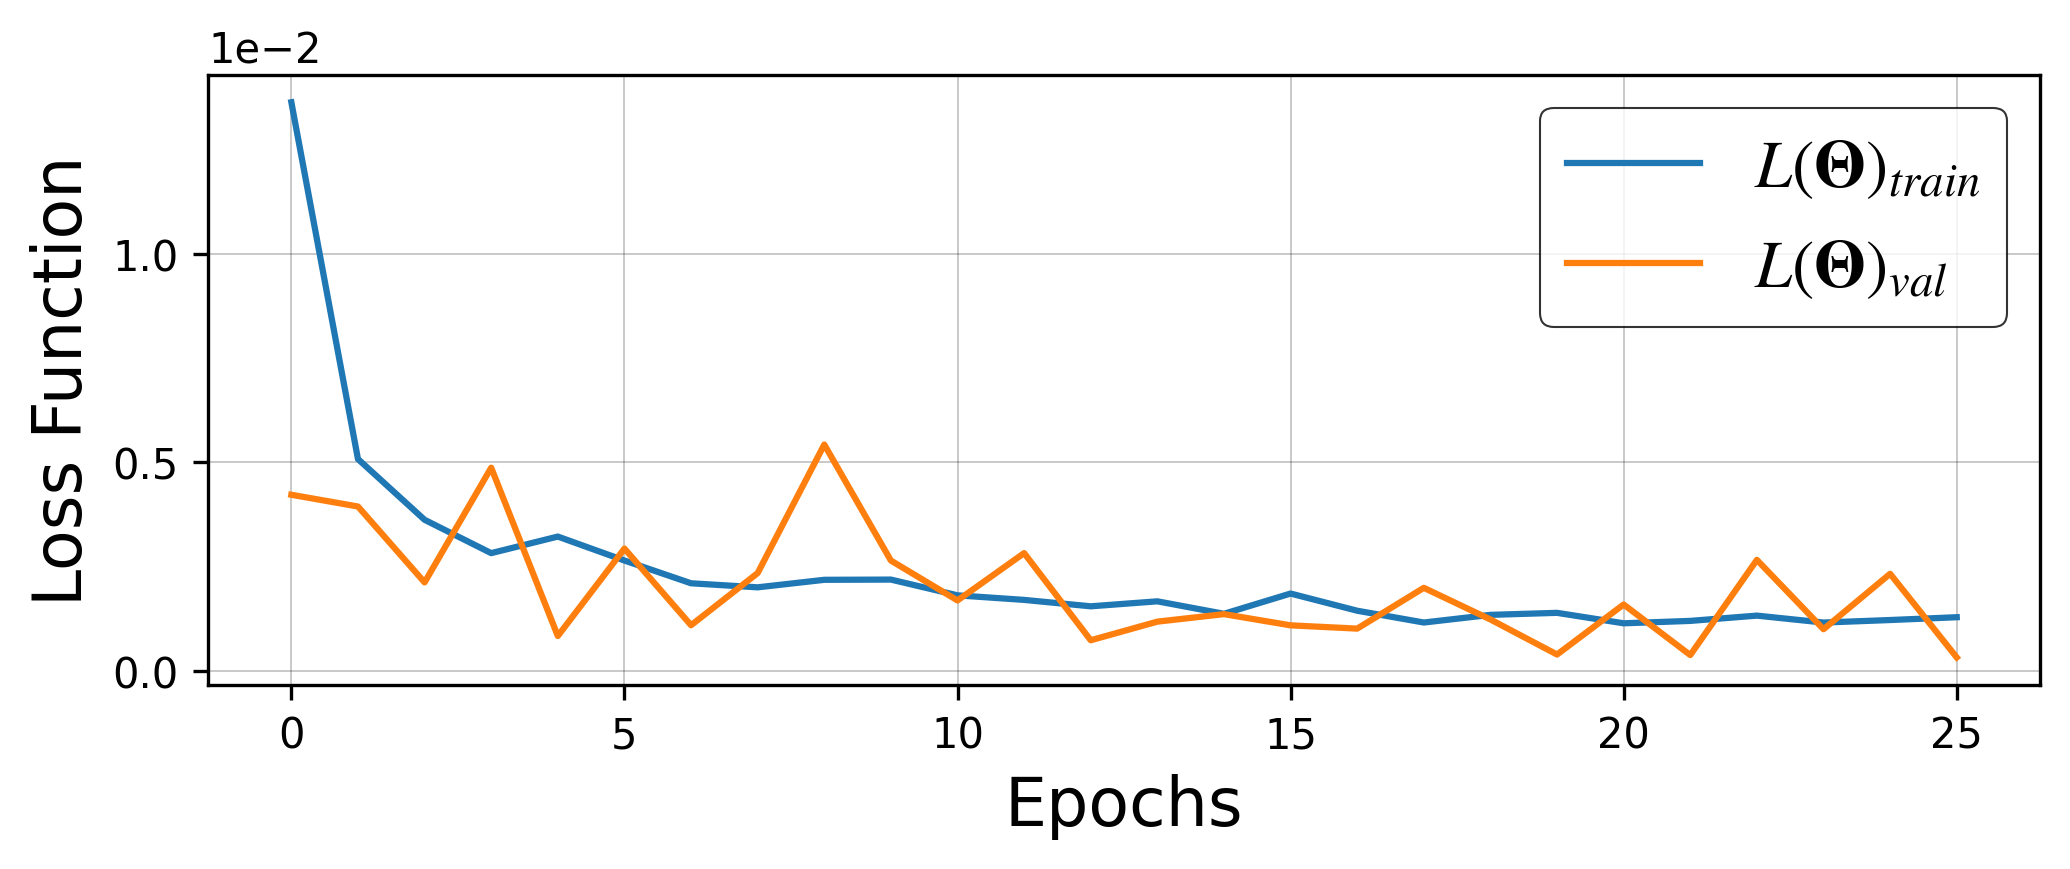

In [ ]:
figure(num=None, figsize=(7, 3), dpi=300, facecolor='w', edgecolor='k')
grid(color='k', linestyle=':', linewidth=.1, which='minor', alpha=0.5)
grid(color='k', linestyle='-', linewidth=.1, which='major', alpha=1)

font={'fontname':'Times','weight':'light','size':16}

hist = pd.DataFrame(history.history)

import matplotlib.ticker as mticker

plt.plot(hist["loss"],label=r'$L(\mathbf{\Theta})_{train}$')
plt.plot(hist["val_loss"],label=r'$L(\mathbf{\Theta})_{val}$')
plt.ticklabel_format(axis='y', style='sci',scilimits=(0,0))
plt.ticklabel_format(axis='x', style='Plain',useOffset=False)
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(5)) #step for x labels

plt.xlabel('Epochs',**font)
plt.ylabel(r'Loss Function',**font) 

leg = plt.legend(loc='best',fontsize=16, edgecolor='k')
leg.get_frame().set_linewidth(0.5)

from pylab import MaxNLocator

plt.rcParams["font.family"] = "Times"
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['mathtext.it'] = 'Times:italic'
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
plt.tight_layout()

findfont: Font family ['Times'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times'] not found. Falling back to DejaVu Sans.


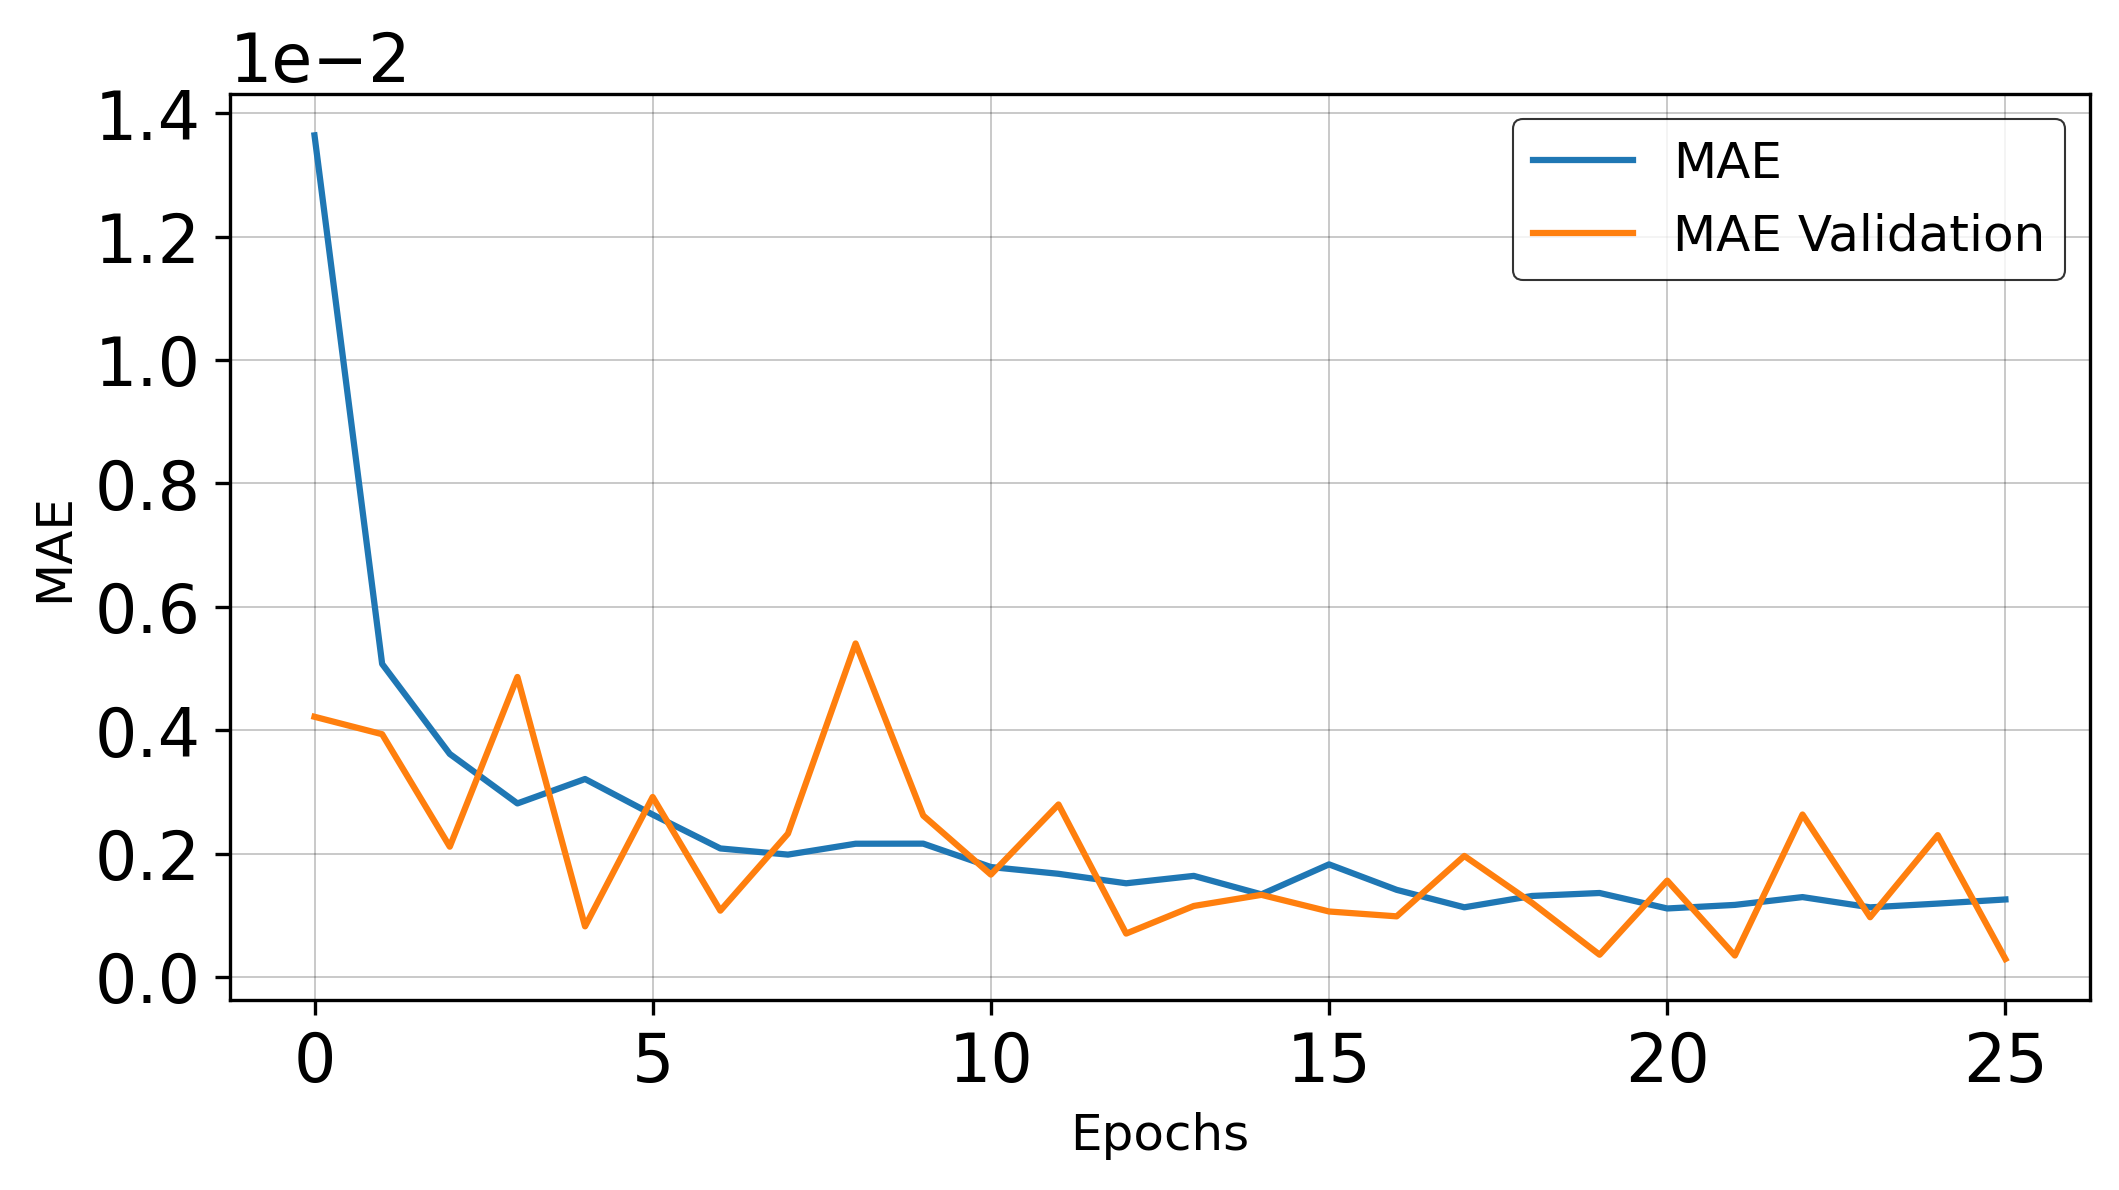

In [ ]:
figure(num=None, figsize=(8, 4), dpi=300, facecolor='w', edgecolor='k')
grid(color='k', linestyle=':', linewidth=.1, which='minor', alpha=0.5)
grid(color='k', linestyle='-', linewidth=.1, which='major', alpha=1)

font={'fontname':'Times','weight':'light','size':12}

hist = pd.DataFrame(history.history)
#epoch,loss = hist["loss"]
#plt.plot(epoch-0.5,loss,label=r'$J(\theta)_{train}$')
plt.plot(hist["mae"],label='MAE')
plt.plot(hist["val_mae"],label='MAE Validation')
plt.ticklabel_format(axis='y', style='sci',scilimits=(0,0))
plt.ticklabel_format(axis='x', style='Plain',useOffset=False)
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(5)) #Da el paso para los x labels

plt.xlabel('Epochs',**font)
plt.ylabel('MAE',**font)

#leg = plt.legend(title=f'Location: {ubicaciones[indice]}',loc='best',fontsize=12, edgecolor='k')
leg = plt.legend(loc='best',fontsize=12, edgecolor='k')
leg.get_frame().set_linewidth(0.5)

plt.rcParams["font.family"] = "Times"
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['mathtext.it'] = 'Times:italic'
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 

4928/4928 [==============================] - 8s 2ms/step
(367918, 1)
Train Score: 0.7526 RMSE
Test Score: 0.4838 RMSE
Train Score: 0.0728 MAE
Test Score: 0.0573 MAE
R2 Train = 0.8424
R2 Test =  0.8844
# Trainings = 1


No handles with labels found to put in legend.
findfont: Font family ['Times'] not found. Falling back to DejaVu Sans.


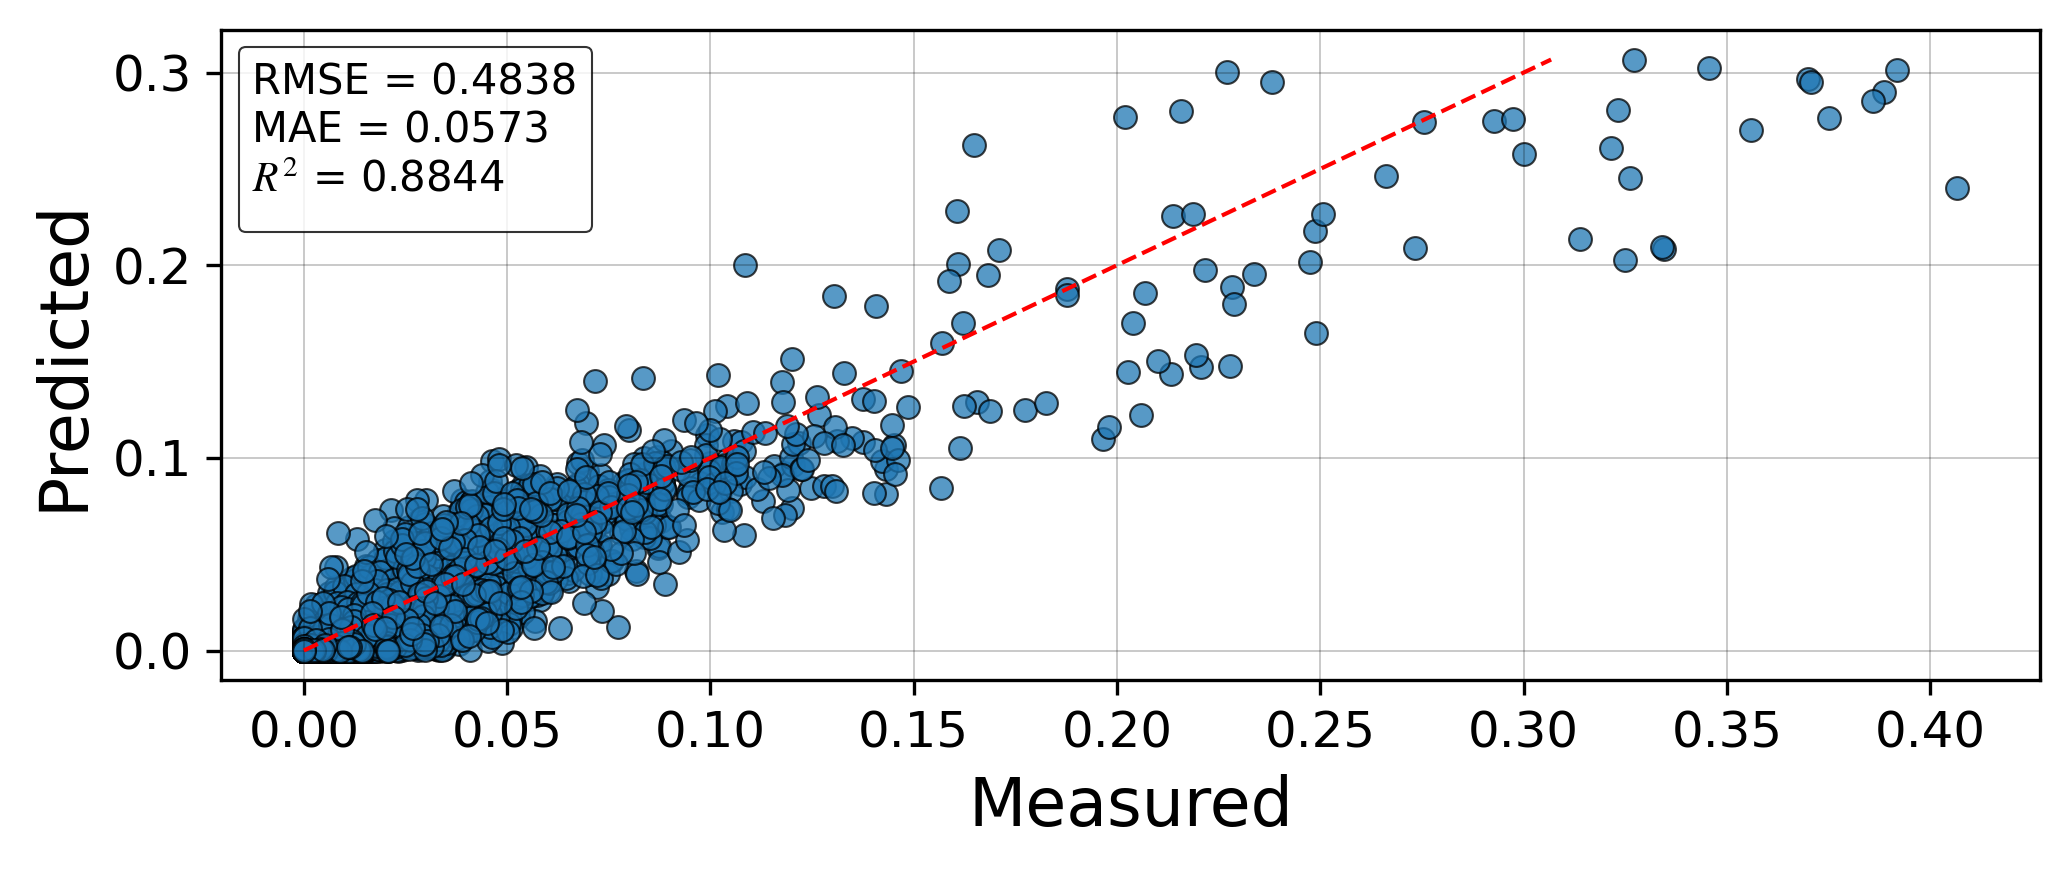

In [ ]:
# make predictions
trainPredict = model.predict(trainX, verbose=1)
testPredict = model.predict(testX, verbose=1)
from sklearn.metrics import mean_absolute_error

print(trainPredict.shape)

# invert predictions
trainScore = math.sqrt(mean_squared_error(trainY[:]*sig+mu, trainPredict[:]*sig+mu))
print('Train Score: %.4f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[:]*sig+mu, testPredict[:]*sig+mu))

print('Test Score: %.4f RMSE' % (testScore))

trainScore_abs = (mean_absolute_error(trainY[:]*sig+mu, trainPredict[:]*sig+mu))
print('Train Score: %.4f MAE' % (trainScore_abs))
testScore_abs = (mean_absolute_error(testY[:]*sig+mu, testPredict[:]*sig+mu))
print('Test Score: %.4f MAE' % (testScore_abs))

R2_Train = 1-((trainScore**2)*len(trainPredict)/np.sum(((trainY*sig+mu)-np.mean(trainY*sig+mu))**2))
R2_Test = 1-((testScore**2)*len(testPredict)/np.sum(((testY*sig+mu)-np.mean(testY*sig+mu))**2))

print('R2 Train = %.4f' % (R2_Train))
print('R2 Test =  %.4f' % (R2_Test))

print(f'# Trainings = {Training}')

figure(num=None, figsize=(7, 3), dpi=300, facecolor='w', edgecolor='k')
grid(color='k', linestyle=':', linewidth=.1, which='minor', alpha=0.5)
grid(color='k', linestyle='-', linewidth=.1, which='major', alpha=1)

font={'fontname':'Times','weight':'light','size':16}

plt.scatter(testY, testPredict,s=30,marker='o',edgecolor='k',alpha=0.75,linewidths=0.5)
plt.plot([testY.min(), testPredict.max()], [testY.min(), testPredict.max()],'r--',lw=1)

leg = plt.legend(title=f'RMSE = {testScore:.4f}\nMAE = {testScore_abs:.4f}\n$R^2$ = {R2_Test:.4f}',loc='best', edgecolor='k',fontsize='small')
leg.get_frame().set_linewidth(0.5)

plt.xlabel('Measured',**font)
plt.ylabel('Predicted',**font)

plt.rcParams["font.family"] = "Times"
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['mathtext.it'] = 'Times:italic'
plt.rcParams['legend.title_fontsize'] = 'x-large'
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
plt.tight_layout()